In [ ]:
#https://github.com/codebasics/py/blob/master/ML/16_regularization/L1%20and%20L2%20Regularization.ipynb
#https://github.com/krishnaik06/RegressionandLasso/blob/master/Lassoand%20Regression.ipynb

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
topn = 20
x = housing['data'][:topn,:1]
X =sm.add_constant(x)
y=housing['target'][:topn]
res =sm.OLS(y,X).fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     62.44
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           2.92e-07
Time:                        12:54:11   Log-Likelihood:                -10.134
No. Observations:                  20   AIC:                             24.27
Df Residuals:                      18   BIC:                             26.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0572      0.206      5.138      0.0

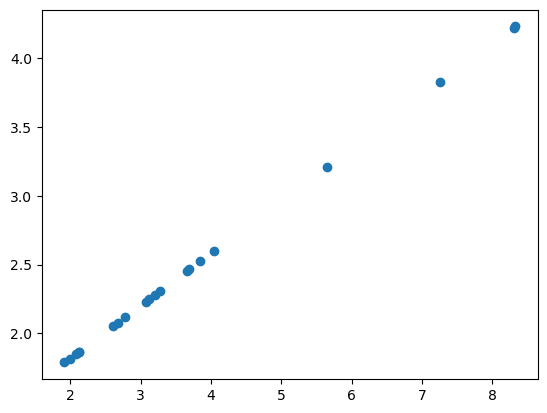

In [6]:
x1 = housing['data'][:topn,0]
y_hat = res.fittedvalues
plt.scatter(x1,y_hat)

In [8]:
x = housing['data'][:topn,:2]
X =sm.add_constant(x)
y=housing['target'][:topn]
res =sm.OLS(y,X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     33.11
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           1.37e-06
Time:                        12:57:39   Log-Likelihood:                -9.2232
No. Observations:                  20   AIC:                             24.45
Df Residuals:                      17   BIC:                             27.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1124      0.941     -0.119      0.9

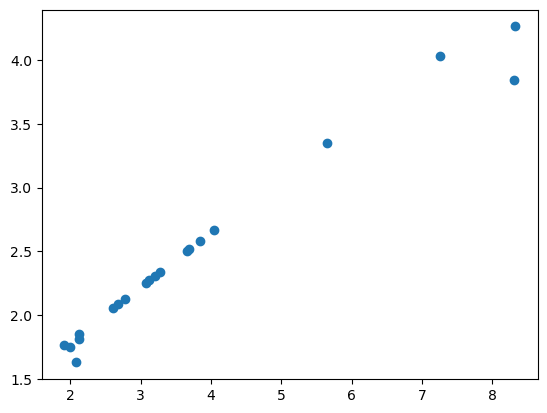

In [9]:
plt.scatter(x1,res.fittedvalues)

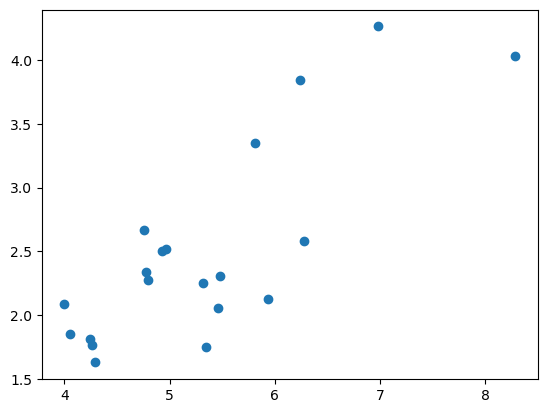

In [10]:
# house Age
x2=housing['data'][:topn,2]
plt.scatter(x2,res.fittedvalues)

In [11]:
x = housing['data'][:topn,:6]
X =sm.add_constant(x)
y=housing['target'][:topn]
res =sm.OLS(y,X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     12.03
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           0.000118
Time:                        13:00:37   Log-Likelihood:                -6.3046
No. Observations:                  20   AIC:                             26.61
Df Residuals:                      13   BIC:                             33.58
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0179      3.635      0.005      0.9

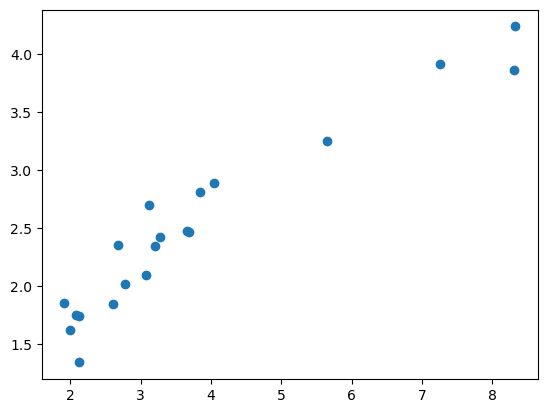

In [12]:
plt.scatter(x1,res.fittedvalues)

In [14]:
# ridge regression
x = housing['data'][:topn,:6]
X =sm.add_constant(x)
y=housing['target'][:topn]
res = sm.OLS(y,X).fit_regularized(alpha = 0.5,L1_wt=0)
# L1_wt penalty and value between 0 to 1 ; 0 for ridge and 1 for lasso fit 
#alpha value is a lamba value




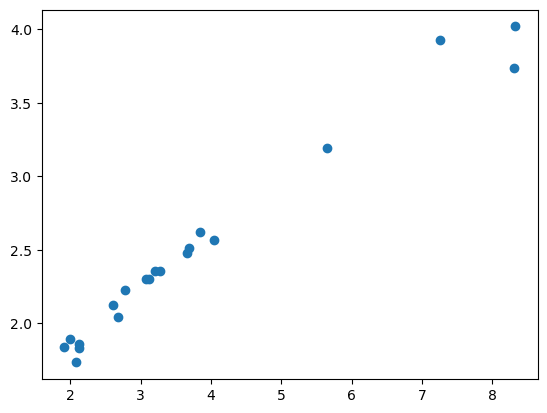

In [15]:
plt.scatter(x1,res.fittedvalues)

In [16]:
res.params

array([ 9.43710490e-03,  3.45901690e-01,  1.64002452e-02,  7.62706124e-02,
        1.17731611e-02,  4.47719623e-05, -3.94367829e-02])

In [17]:
# lasso

In [21]:
x = housing['data'][:topn,:6]
X = sm.add_constant(x)
y= housing['target'][:topn]
res=sm.OLS(y,X).fit_regularized(alpha = 0.8 ,L1_wt = 1)

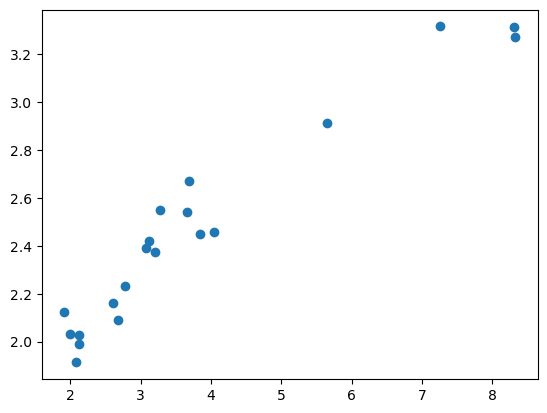

In [22]:
plt.scatter(x1,res.fittedvalues)

In [23]:
res.params

array([0.        , 0.25907503, 0.02508605, 0.        , 0.        ,
       0.00026565, 0.        ])

In [24]:
#elastic net regression

In [25]:
x = housing['data'][:topn,:6]
X = sm.add_constant(x)
y= housing['target'][:topn]
res=sm.OLS(y,X).fit_regularized(alpha = 0.8 ,L1_wt = 0.5)

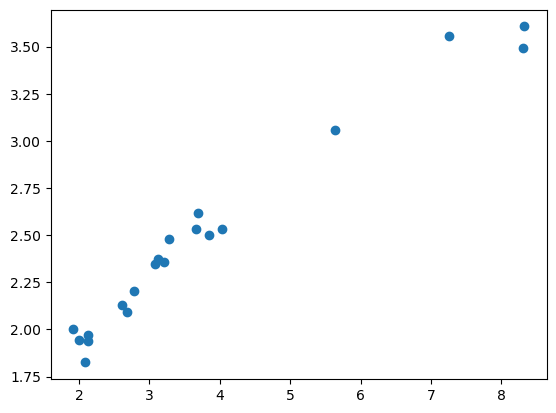

In [26]:
plt.scatter(x1,res.fittedvalues)

In [27]:
res.params

array([0.00000000e+00, 3.13156452e-01, 2.30308688e-02, 0.00000000e+00,
       0.00000000e+00, 1.70891629e-04, 0.00000000e+00])

In [28]:
#more wieght to l1
x = housing['data'][:topn,:6]
X = sm.add_constant(x)
y= housing['target'][:topn]
res=sm.OLS(y,X).fit_regularized(alpha = 0.8 ,L1_wt = 0.8)

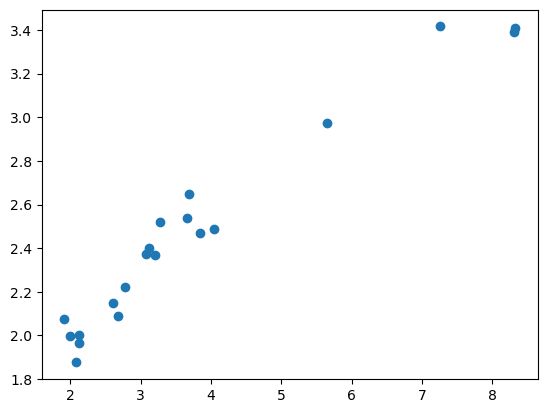

In [29]:
plt.scatter(x1,res.fittedvalues)

In [30]:
res.params

array([0.00000000e+00, 2.81771662e-01, 2.42133319e-02, 0.00000000e+00,
       0.00000000e+00, 2.26281233e-04, 0.00000000e+00])

In [31]:
x = housing['data'][:topn,:6]
X = sm.add_constant(x)
y= housing['target'][:topn]
res=sm.OLS(y,X).fit_regularized(alpha = 0.8 ,L1_wt = 0.2)

In [32]:
res.params

array([0.00000000e+00, 3.41730420e-01, 2.19821615e-02, 0.00000000e+00,
       0.00000000e+00, 1.19381790e-04, 0.00000000e+00])

In [33]:
#use res.predict(test dataa) to pridict the data